In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

data = pd.read_csv('Dataset-Tugas.csv')
print(data)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### 1 hapus kolom target

In [3]:
### menghapus kolom "sepal width"
data.drop('sepal width', axis=1, inplace=True)
data.head()


,sepal length,petal length,petal width,class
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa


### 2.Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan

In [4]:

data = pd.read_csv('Dataset-Tugas.csv')
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


dari hasil tersebut dapat dilihan data tersebt semua kolom memiliki 150 data.maka menunjukan tidak ada data yang hilang. rata rata mean
sepal lenght : panjang 5.843333
sepal width  : lebar 3.05400
petal lenght ; panjng 3.7586
petal widht  : lebar 1.1986

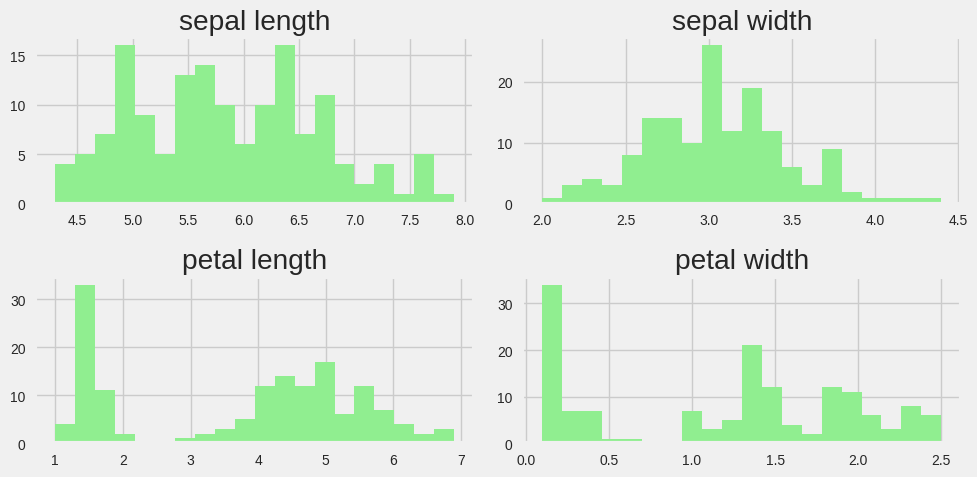

In [7]:
data.hist(figsize=(10, 5), bins=20, color='lightgreen')
plt.tight_layout()
plt.show()

1. Sepal Length
Distribusi: Data cenderung memiliki distribusi normal (mendekati simetris) dengan puncak di sekitar 5.5 - 6.0 cm.
Rentang: Nilai panjang sepal berkisar antara 4.5 cm hingga 8.0 cm.
Frekuensi tertinggi: Terjadi pada interval 5.5 - 6.0 cm, dengan frekuensi lebih dari 15 sampel.
2. Sepal Width
Distribusi: Tidak simetris (skewed) dengan puncak di sekitar 3.0 cm.
Rentang: Lebar sepal bervariasi antara 2.0 cm hingga 4.5 cm.
Frekuensi tertinggi: Interval 2.9 - 3.2 cm memiliki frekuensi lebih dari 20 sampel.
3. Petal Length
Distribusi: Data terlihat bimodal (dua puncak distribusi), dengan puncak pertama di sekitar 1.0 - 1.5 cm dan puncak kedua di sekitar 4.5 - 5.0 cm.
Rentang: Panjang petal berkisar antara 1.0 cm hingga 7.0 cm.
Frekuensi tertinggi: Interval 1.0 - 1.5 cm memiliki jumlah sampel terbanyak (lebih dari 30 sampel), menunjukkan bahwa kategori tertentu (kemungkinan Iris-setosa) mendominasi di rentang ini.
4. Petal Width
Distribusi: Data juga terlihat bimodal, dengan puncak pertama di sekitar 0.1 - 0.5 cm dan puncak kedua di sekitar 1.3 - 1.8 cm.
Rentang: Lebar petal berkisar dari 0.1 cm hingga 2.5 cm.
Frekuensi tertinggi: Interval 0.1 - 0.5 cm memiliki jumlah sampel terbanyak (lebih dari 30 sampel), kemungkinan besar dari kategori yang sama dengan petal length.

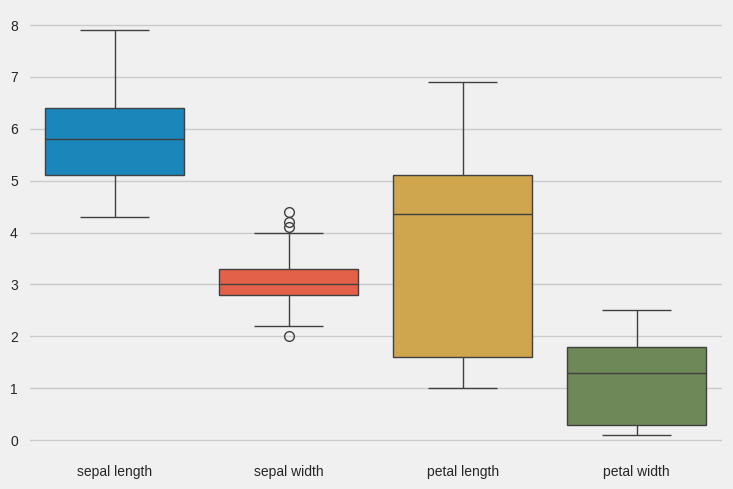

In [8]:
sns.boxplot(data)
plt.show()

1. Sepal Length
Distribusi: Relatif simetris, dengan median sekitar 5.8 cm.
Rentang data: Sepal length bervariasi dari sekitar 4.5 cm hingga 7.9 cm.
Outlier: Tidak ada outlier yang signifikan.
2. Sepal Width
Distribusi: Cenderung miring (skewed) ke kiri, dengan median sekitar 3.0 cm.
Rentang data: Lebar sepal berkisar antara 2.0 cm hingga 4.4 cm.
Outlier: Terdapat beberapa outlier kecil di bawah 2.5 cm, menunjukkan ada nilai lebar sepal yang lebih kecil dibandingkan dengan data lainnya.
3. Petal Length
Distribusi: Data lebih menyebar dibandingkan fitur lainnya, dengan median sekitar 4.3 cm.
Rentang data: Bervariasi dari sekitar 1.0 cm hingga 6.9 cm.
Outlier: Tidak ada outlier yang signifikan, tetapi data memiliki rentang besar yang mencakup berbagai kategori spesies.
4. Petal Width
Distribusi: Relatif simetris, dengan median sekitar 1.3 cm.
Rentang data: Lebar petal berkisar antara 0.1 cm hingga 2.5 cm.
Outlier: Tidak ada outlier yang mencolok.

### 3. • Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['petal length'] = le.fit_transform(data['petal length'])
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,4,0.2,0
1,4.9,3.0,4,0.2,0
2,4.7,3.2,3,0.2,0
3,4.6,3.1,5,0.2,0
4,5.0,3.6,4,0.2,0


In [12]:
# Scalling
# instantiate
scaler = StandardScaler()

# fit_transform
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.22310820e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.22310820e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.30924258e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.13697382e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.22310820e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.95766909e+00, -9.64705059e-01,
        -1.05003079e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.22310820e+00,
        -1.18150376e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.13697382e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.22310820e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.13697382e+00,
        -1.44444970e+00

### hasil Array tersebut memiliki dimensi(N, 5)

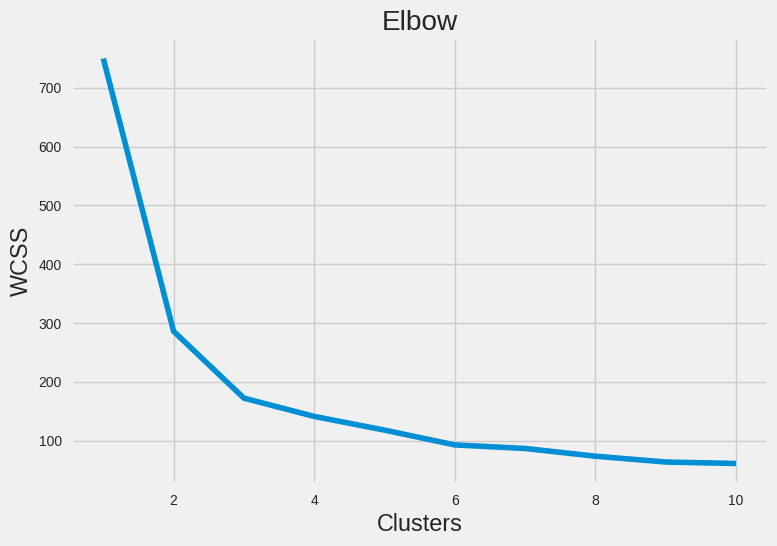

In [14]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

In [17]:
data['Label_K-Means'] = y_pred1
data.rename(columns={data.columns[-1]: 'Label_K-Means'}, inplace=True)
print(data.head())


   sepal length  sepal width  petal length  petal width  class  Label_K-Means
0           5.1          3.5             4          0.2      0              1
1           4.9          3.0             4          0.2      0              1
2           4.7          3.2             3          0.2      0              1
3           4.6          3.1             5          0.2      0              1
4           5.0          3.6             4          0.2      0              1


### 4.• Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!

In [19]:
model2 = DBSCAN(eps=1, min_samples=10)
model2.fit(x_scaled)
y_pred2 = model2.labels_
y_pred2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [20]:
data['Label_DB-Scan'] = y_pred2
data.rename(columns={data.columns[-1]: 'Label_DB-Scan'}, inplace=True)
print(data.head())

   sepal length  sepal width  petal length  petal width  class  Label_K-Means  \
0           5.1          3.5             4          0.2      0              1   
1           4.9          3.0             4          0.2      0              1   
2           4.7          3.2             3          0.2      0              1   
3           4.6          3.1             5          0.2      0              1   
4           5.0          3.6             4          0.2      0              1   

   Label_DB-Scan  
0              0  
1              0  
2              0  
3              0  
4              0  


### 5. Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!

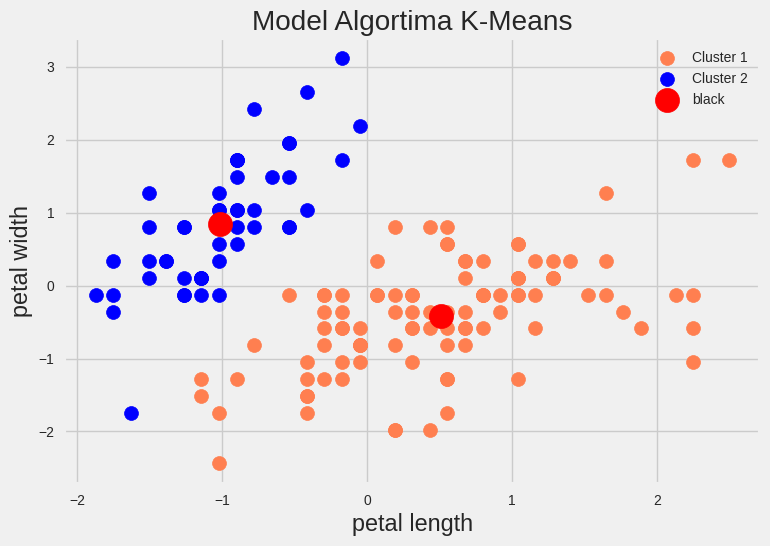

In [26]:
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

plt.scatter(x_scaled[y_pred1 == 0, 0], x_scaled[y_pred1 == 0, 1],
            s = 100, c = 'coral', label = 'Cluster 1')

plt.scatter(x_scaled[y_pred1 == 1, 0], x_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'red', label = 'black')

plt.title('Model Algortima K-Means')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

Dari hasil scatter plot algoritma K-Means apat diinterpretasi:

Karakteristik Cluster:

Cluster 1 (Warna Coral/Oranye):

Rentang nilai pada sumbu X (petal length): Dari sekitar -2 hingga 0.
Rentang nilai pada sumbu Y (petal width): Dari sekitar -2 hingga 2.
Cluster ini memiliki data yang lebih tersebar di area dengan nilai petal length lebih pendek, menunjukkan bentuk bunga dengan kelopak yang lebih pendek namun cenderung lebar.
Cluster 2 (Warna Biru):

Rentang nilai pada sumbu X (petal length): Dari sekitar -1 hingga 2.
Rentang nilai pada sumbu Y (petal width): Dari sekitar 0 hingga 3.
Cluster ini berisi data yang memiliki rentang petal length lebih panjang dengan variasi petal width yang cukup besar, menunjukkan bunga dengan kelopak yang lebih panjang.
Centroid (Pusat Cluster):

Centroid ditunjukkan oleh titik merah besar.
Posisi centroid ini menggambarkan pusat gravitasi masing-masing cluster berdasarkan distribusi datanya:
Centroid untuk Cluster 1: Berada di sekitar (-1, 0).
Centroid untuk Cluster 2: Berada di sekitar (1, 1).


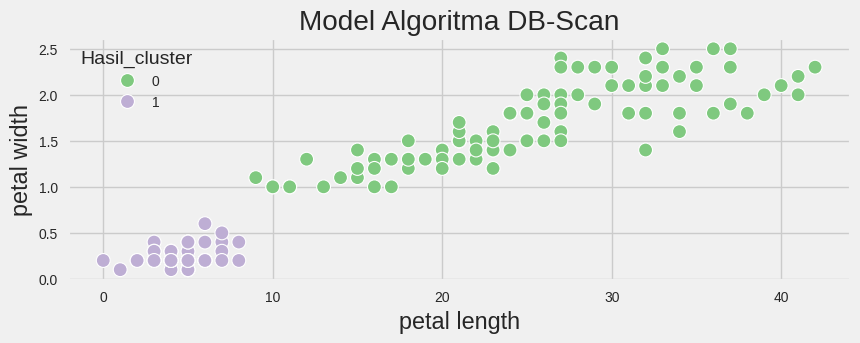

In [25]:
plt.figure(figsize=(9,3))
data['Hasil_cluster'] = y_pred1

sns.scatterplot(x = 'petal length', y = 'petal width',
                hue = 'Hasil_cluster', data = data, palette = 'Accent', s = 100)
plt.title('Model Algoritma DB-Scan')
plt.show()

interpretasi algoritma DB-Scan

Cluster Identifikasi:

Cluster 0 (Warna Hijau):
Titik-titik ini mewakili kelompok data yang termasuk dalam core points cluster pertama.
Data dengan panjang kelopak (petal length) memiliki rentang nilai yang lebar, yaitu dari sekitar 10 hingga lebih dari 40.
Lebar kelopak (petal width) juga bervariasi, dengan rentang nilai dari sekitar 0,5 hingga 2,5.
Cluster 1 (Warna Ungu):
Titik-titik ini membentuk cluster yang lebih kecil.
Rentang nilai petal length berada di sekitar 0 hingga 10, dan petal width berada dalam rentang 0 hingga 0,5.
Karakteristik Algoritma DB-Scan:

DB-Scan memisahkan kelompok data berdasarkan kepadatan lokal. Data yang memiliki jarak dekat dan cukup kepadatan dianggap sebagai satu cluster.
Data di cluster 0 menunjukkan penyebaran yang lebih luas dan berkelompok, sementara cluster 1 lebih terkonsentrasi di area dengan nilai panjang dan lebar kelopak yang lebih kecil.
Tidak terlihat outlier dalam hasil ini, sehingga data terklasifikasi secara rapi dalam dua kelompok.

###6. Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

In [27]:
score = silhouette_score(x_scaled, y_pred1)
print("Matriks Silhoutte Score: ", score)


Matriks Silhoutte Score:  0.5603532863541593


In [28]:
score = davies_bouldin_score(x_scaled, y_pred1)
print("Matriks Davies Bouldin Index: ", score)

Matriks Davies Bouldin Index:  0.606723793559653
